In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
import scipy.stats
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *

from mpl_toolkits.axes_grid1 import make_axes_locatable


In [80]:

import matplotlib as mlib
from scipy import stats

mlib.rcParams.update({'font.size': 25})
mlib.rcParams.update({'errorbar.capsize': 5})

In [3]:
data = np.load("C:/Work/phd/simulation_statistics/batch_analysis_090710_12012018.npz")

metadata = np.load("C:/Work/phd/simulation_statistics/batch_e2b7e12aaa0b85f9bea62f5b49e13064.npz")
print data['recording_archive_name']

../synaptogenesis/e2b7e12aaa0b85f9bea62f5b49e13064/case1_inputtype4_lesiontype2_sigma_stim4_run1_@e2b7e12aaa0b85f9bea62f5b49e13064.npz


In [4]:
snapshots = data['snapshots']
params = data['params']
dt = np.dtype([('rate', 'float'), 
               ('number_ff_synapses', 'float'), 
               ('final_weight_proportion', 'float'), 
               ('init_mean_std', 'float'),
               ('fin_mean_std_conn_shuf', 'float'),
               ('fin_mean_std_conn', 'float'),
               ('wsr_sigma_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_std_weight_shuf', 'float'),
               ('fin_mean_std_weight', 'float'),
               ('wsr_sigma_fin_weight_fin_weight_shuffle', 'float'),
               ('init_mean_AD', 'float'),
               ('fin_mean_AD_conn_shuf', 'float'),
               ('fin_mean_AD_conn', 'float'),
               ('wsr_AD_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_AD_weight_shuf', 'float'),
               ('fin_mean_AD_weight', 'float'),
               ('wsr_AD_fin_weight_fin_weight_shuffle', 'float'),
#                ('file_path', 'S59')
              ])
results = np.array(data['results'][:, :-1], dtype=dt)

In [5]:
parameters_of_interest = metadata['parameters_of_interest']

In [6]:
parameters_of_interest

array({'input_types': [1, 3, 4], 'cases': [1], 'no_runs': 1, 'lesion_types': [0, 1, 2], 'sigma_stim': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4]}, dtype=object)

In [7]:
params[0]

array([ {'tau_refrac': 5.0, 'lateral_inhibition': 0, 'simtime': 300000, 'a_plus': 0.1, 't_plus': 20.0, 'random_partner': False, 'f_rew': 10000, 't_stim': 20, 'p_form_forward': 0.16, 'sigma_form_forward': 2.5, 'f_base': 5, 's_max': 16, 'delay': 1, 'a_minus': 0.0375, 'p_elim_pot': 0.00013600000000000003, 'g_max': 0.2, 't_record': 30000, 'lesion': 0, 'f_peak': 152.8, 'grid': array([16, 16], dtype=int64), 'case': 1, 'sigma_stim': 0.5, 'b': 1.2, 'sigma_form_lateral': 1, 'p_elim_dep': 0.0245, 'p_form_lateral': 1, 't_minus': 64, 'input_type': 1, 'cell_params': {'tau_refrac': 5.0, 'tau_m': 20.0, 'e_rev_E': 0.0, 'i_offset': 0.0, 'cm': 20.0, 'e_rev_I': -80.0, 'v_thresh': -50.0, 'tau_syn_E': 5.0, 'v_rest': -70.0, 'tau_syn_I': 5.0, 'v_reset': -70.0}},
       '../synaptogenesis/e2b7e12aaa0b85f9bea62f5b49e13064/case1_inputtype1_lesiontype0_sigma_stim0.5_run1_@e2b7e12aaa0b85f9bea62f5b49e13064.npz'], dtype=object)

In [8]:
all_names = np.asarray(results.dtype.names)

In [9]:
results.dtype.names

('rate',
 'number_ff_synapses',
 'final_weight_proportion',
 'init_mean_std',
 'fin_mean_std_conn_shuf',
 'fin_mean_std_conn',
 'wsr_sigma_fin_conn_fin_conn_shuffle',
 'fin_mean_std_weight_shuf',
 'fin_mean_std_weight',
 'wsr_sigma_fin_weight_fin_weight_shuffle',
 'init_mean_AD',
 'fin_mean_AD_conn_shuf',
 'fin_mean_AD_conn',
 'wsr_AD_fin_conn_fin_conn_shuffle',
 'fin_mean_AD_weight_shuf',
 'fin_mean_AD_weight',
 'wsr_AD_fin_weight_fin_weight_shuffle')

In [10]:
interesting_names = all_names[np.where(['init' not in name and 'wsr' not in name for name in all_names])]
interesting_names_indices = np.where(['init' not in name and 'wsr' not in name for name in all_names])[0]
print interesting_names
print interesting_names.shape
print [interesting_names[0]]
print results[interesting_names[0]].shape
print results['rate'].shape
print results['rate'].size

['rate' 'number_ff_synapses' 'final_weight_proportion'
 'fin_mean_std_conn_shuf' 'fin_mean_std_conn' 'fin_mean_std_weight_shuf'
 'fin_mean_std_weight' 'fin_mean_AD_conn_shuf' 'fin_mean_AD_conn'
 'fin_mean_AD_weight_shuf' 'fin_mean_AD_weight']
(11L,)
['rate']
(72L, 17L)
(72L, 17L)
1224


In [11]:
correlation = scipy.stats.spearmanr(results[:, interesting_names_indices])

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
 [py.warnings]
  "values. nan values will be ignored.", RuntimeWarning)



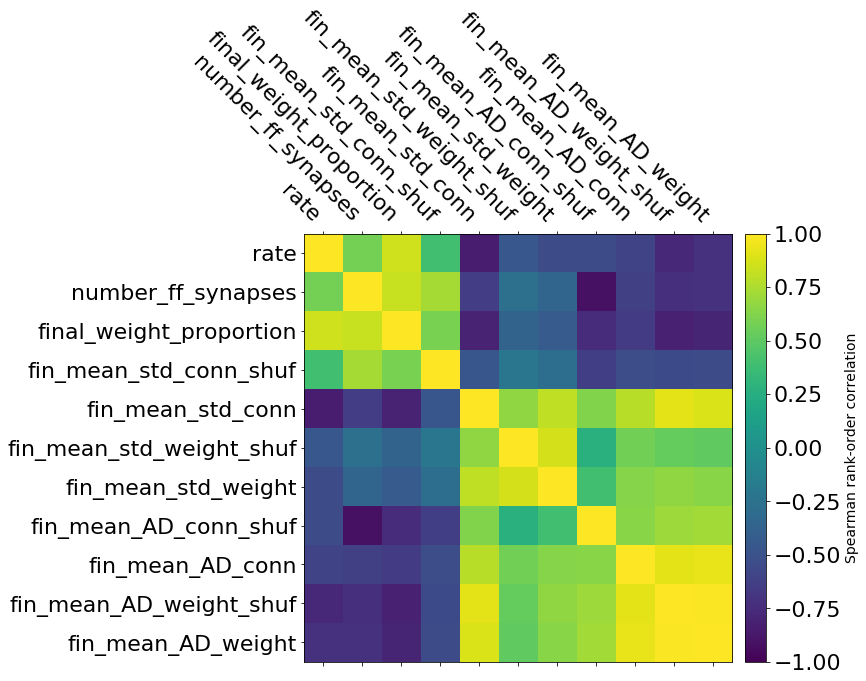

In [12]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(correlation.correlation, vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(interesting_names.size))
ax1.set_xticklabels(interesting_names, rotation='-45', ha='right')
ax1.set_yticks(range(interesting_names.size))
ax1.set_yticklabels(interesting_names, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
f.savefig('result_matrix_correlations.png')

In [13]:
# Fine, but how do my parameters covary with all of the results?
# append these parameters of interest to the results matrix(?)

In [14]:
parameters_of_interest.ravel()[0]

{'cases': [1],
 'input_types': [1, 3, 4],
 'lesion_types': [0, 1, 2],
 'no_runs': 1,
 'sigma_stim': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4]}

In [15]:
del parameters_of_interest.ravel()[0]['no_runs']

In [16]:
parameters_of_interest.ravel()[0]['lesions'] = parameters_of_interest.ravel()[0].pop('lesion_types')

In [17]:
parameters_of_interest.ravel()[0]['sigma_stims'] = parameters_of_interest.ravel()[0].pop('sigma_stim')

In [18]:
params_of_interest = parameters_of_interest.ravel()[0].keys()
set_of_poi = np.ones((results.shape[0], len(params_of_interest))) * np.nan
for index, param_set in np.ndenumerate(params[:,0]):
    for poi in range(len(params_of_interest)):
        set_of_poi[index[0], poi] = param_set[params_of_interest[poi][:-1]]

In [19]:
results_with_poi = np.concatenate((np.asarray(results[:, interesting_names_indices], dtype=float), set_of_poi), axis=1)

In [20]:
correlation_with_poi = scipy.stats.spearmanr(results_with_poi)

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\lib\function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
 [py.warnings]
  c /= stddev[:, None]

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\lib\function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
 [py.warnings]
  c /= stddev[None, :]

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
 [py.warnings]
  return (self.a < x) & (x < self.b)

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
 [py.warnings]
  return (self.a < x) & (x < self.b)

WARNING    C:\WinPython-64bit

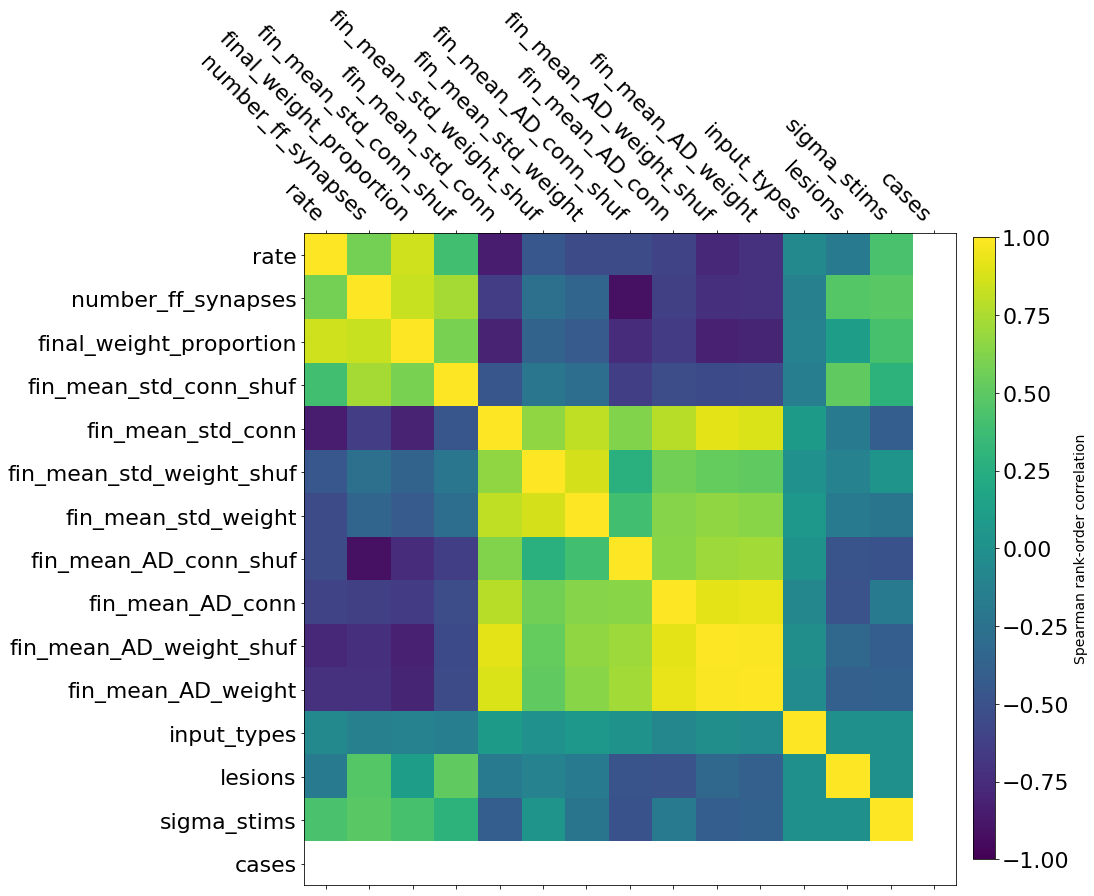

In [21]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(correlation_with_poi.correlation, vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(results_with_poi.shape[1]))
ax1.set_xticklabels(interesting_names.tolist() + params_of_interest, rotation='-45', ha='right')
ax1.set_yticks(range(results_with_poi.shape[1]))
ax1.set_yticklabels(interesting_names.tolist() + params_of_interest, ha='right')
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
f.savefig('result_matrix_w_params_correlations.png')

In [22]:
correlation_with_poi_v2 = scipy.stats.spearmanr(results[:, interesting_names_indices], set_of_poi)

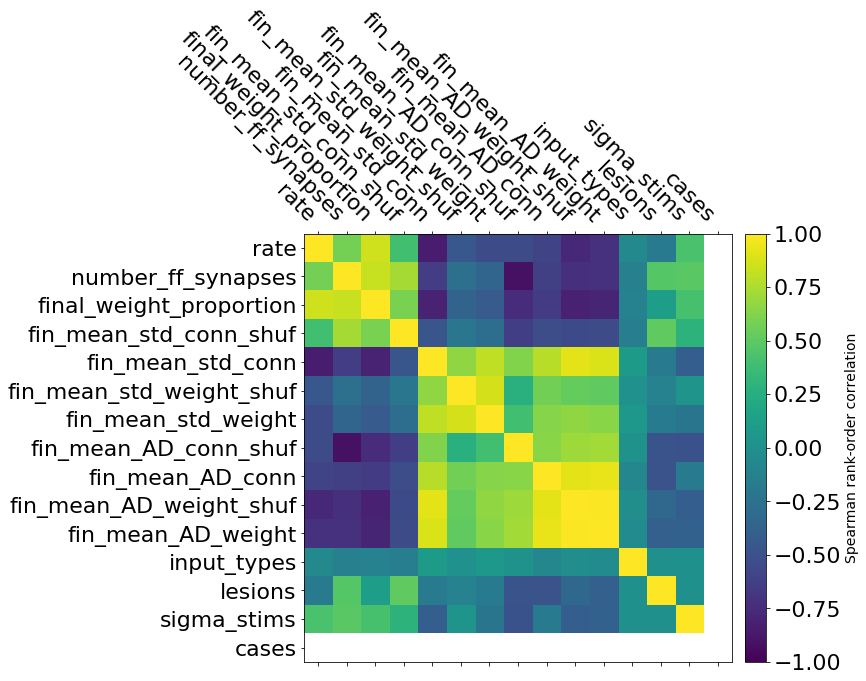

In [23]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(correlation_with_poi_v2.correlation, vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(results_with_poi.shape[1]))
ax1.set_xticklabels(interesting_names.tolist() + params_of_interest, rotation='-45', ha='right')
ax1.set_yticks(range(results_with_poi.shape[1]))
ax1.set_yticklabels(interesting_names.tolist() + params_of_interest, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
f.savefig('result_matrix_w_params_correlations_v2.png')

In [24]:
print interesting_names_indices
print interesting_names

[ 0  1  2  4  5  7  8 11 12 14 15]
['rate' 'number_ff_synapses' 'final_weight_proportion'
 'fin_mean_std_conn_shuf' 'fin_mean_std_conn' 'fin_mean_std_weight_shuf'
 'fin_mean_std_weight' 'fin_mean_AD_conn_shuf' 'fin_mean_AD_conn'
 'fin_mean_AD_weight_shuf' 'fin_mean_AD_weight']


In [25]:
input_text = ["Gaussian", "Pointy", "Square"]
lesion_text = ["topographic initial connectivity", "random initial connectivity", "no initial connectivity"]

In [26]:
sigma_stims = parameters_of_interest.ravel()[0]['sigma_stims']
lesion_types = parameters_of_interest.ravel()[0]['lesions']
input_types = parameters_of_interest.ravel()[0]['input_types']
hardcoded_t_record = 30 * second

print sigma_stims
print lesion_types
print input_types
print params_of_interest

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4]
[0, 1, 2]
[1, 3, 4]
['input_types', 'lesions', 'sigma_stims', 'cases']


In [27]:
std_weight_all_results = np.ones((len(sigma_stims), len(lesion_types), len(input_types))) * np.nan
ad_weight_all_results = np.ones((len(sigma_stims), len(lesion_types), len(input_types))) * np.nan

init_std_weight_all_results = np.ones((len(sigma_stims), len(lesion_types), len(input_types))) * np.nan
init_ad_weight_all_results = np.ones((len(sigma_stims), len(lesion_types), len(input_types))) * np.nan

In [28]:
CASE_1 = 1
for index, _ in np.ndenumerate(std_weight_all_results):
    sigma_index, lesion_index, input_index = index
    logical_filter = np.logical_and(
                        np.logical_and(results_with_poi[:,-1]==CASE_1, results_with_poi[:, -2]==sigma_stims[sigma_index]),
                        np.logical_and(results_with_poi[:,-3]==lesion_types[lesion_index], results_with_poi[:,-4]==input_types[input_index]))
    std_weight_all_results[index] = results_with_poi[logical_filter].ravel()[4]
    ad_weight_all_results[index] = results_with_poi[logical_filter].ravel()[10]
    # use different set of results
    init_std_weight_all_results[index] = data['results'][:, :-1][logical_filter].ravel()[3]
    init_ad_weight_all_results[index] = data['results'][:, :-1][logical_filter].ravel()[10]




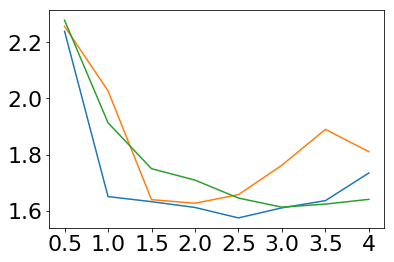

In [29]:

plt.plot(std_weight_all_results[:, 0, 0])
plt.plot(std_weight_all_results[:, 0, 1])
plt.plot(std_weight_all_results[:, 0, 2])
plt.xticks(range(len(sigma_stims)), sigma_stims)
plt.show()

Gaussian input with topographic initial connectivity - min=1.58 max=2.24 std=0.20 sigma_stim=2.50
(debug info: #3E0A4F - )
Gaussian input with random initial connectivity    - min=1.63 max=2.26 std=0.20 sigma_stim=2.00
(debug info: #3E0A4F -- )
Gaussian input with no initial connectivity        - min=1.61 max=2.28 std=0.21 sigma_stim=3.00
(debug info: #3E0A4F : )
Pointy input with topographic initial connectivity - min=1.73 max=2.27 std=0.18 sigma_stim=1.50
(debug info: #366488 - )
Pointy input with random initial connectivity      - min=1.78 max=2.26 std=0.14 sigma_stim=1.50
(debug info: #366488 -- )
Pointy input with no initial connectivity          - min=1.75 max=2.25 std=0.20 sigma_stim=3.00
(debug info: #366488 : )
Square input with topographic initial connectivity - min=1.53 max=2.30 std=0.24 sigma_stim=3.50
(debug info: #f3e718 - )
Square input with random initial connectivity      - min=1.53 max=2.32 std=0.30 sigma_stim=2.50
(debug info: #f3e718 -- )
Square input with no initia

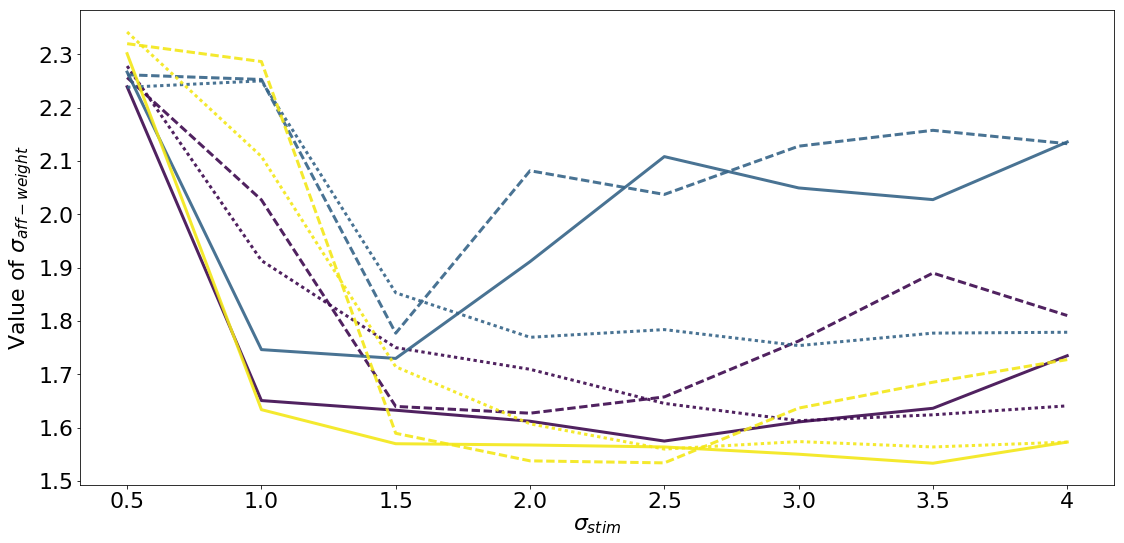

In [30]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
# conc_std_1 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_1, axis=0)))
# conc_std_2 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_2, axis=0)))
# conc_std_3 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_3, axis=0)))

# conc_std_1_std = np.concatenate(([0], stats.sem(all_mean_sigmas_case_1, axis=0)))
# conc_std_2_std = np.concatenate(([0], stats.sem(all_mean_sigmas_case_2, axis=0)))
# conc_std_3_std = np.concatenate(([0], stats.sem(all_mean_sigmas_case_3, axis=0)))


# i = \
# ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $\sigma_{aff\_weight}$ case 1', alpha=.9, linewidth=3)
# ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $\sigma_{aff\_weight}$ case 2', alpha=.7, linewidth=3)
# ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $\sigma_{aff\_weight}$ case 3', alpha=.7, linewidth=3)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )

lines = []
labels= []

for input_type, input_colour in zip(range(len(input_types)), ['#3E0A4F', '#366488','#f3e718']):
    for lesion_type, lesion_ls in zip(range(len(lesion_types)),['-', '--', ':']): 
        the_x = std_weight_all_results[:, input_type, lesion_type]
        l = r'$\mathrm{\sigma}$ ' + '{} input with {}'.format(input_text[input_type], lesion_text[lesion_type])
        labels.append(l)
        
        print "{:50s} - min={:1.2f} max={:1.2f} std={:1.2f} sigma_stim={:1.2f}".format(l[18:], np.min(the_x), np.max(the_x), np.std(the_x), sigma_stims[np.argmin(the_x)])
        print "(debug info:", input_colour, lesion_ls, ")"
        lines.append(ax1.plot(range(len(sigma_stims)), the_x, 
                         label=l, 
                         alpha=.9, linewidth=3,
                        linestyle=lesion_ls, color=input_colour)
                     )
            
# ax1.errorbar(range(len(sigma_stims)), np.mean(np.mean(std_weight_all_results[:, :, :], axis=1), axis=1), 
#              np.std(np.mean(std_weight_all_results[:, :, :], axis=1), axis=1), 
#              color='k', linewidth=3, alpha=.8)

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_std_sigma_stim_vs_input_type_vs_lesion_type.png")
plt.show()

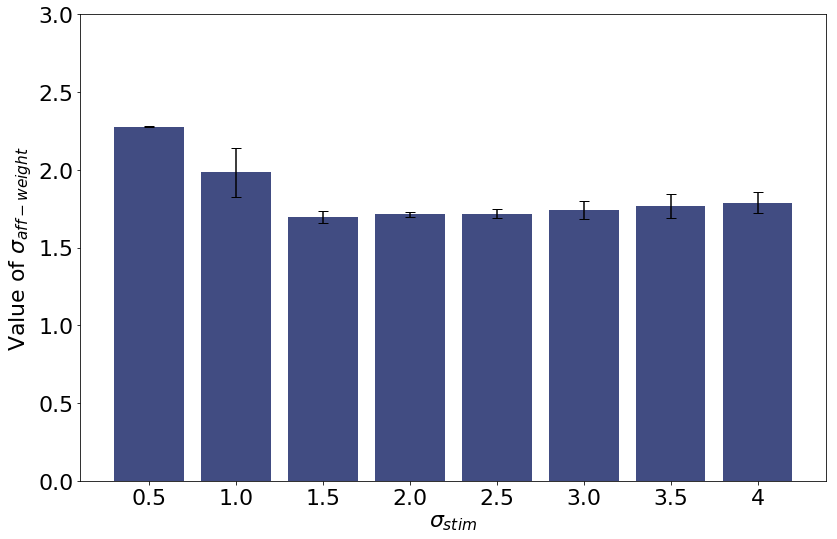

In [31]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)            
ax1.bar(range(len(sigma_stims)), np.mean(np.mean(std_weight_all_results[:, :, :], axis=1), axis=1), 
             yerr=stats.sem(np.mean(std_weight_all_results[:, :, :], axis=1), axis=1), 
#              color='k', 
            color='#414C82',
            linewidth=3)
ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)

ax1.set_ylim([0, 3.0])
# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_std_stderr_bar.png")
plt.savefig("final_mean_std_stderr_bar.svg")
plt.show()

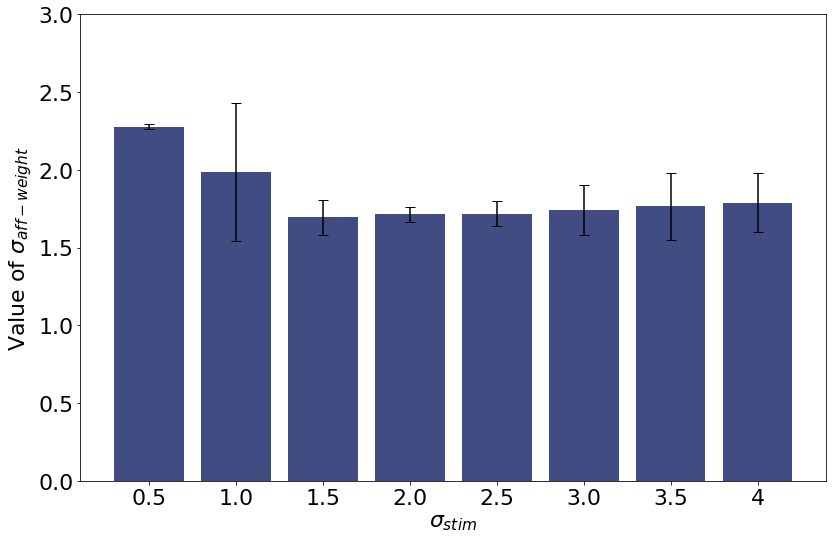

In [32]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)            
ax1.bar(range(len(sigma_stims)), np.mean(np.mean(std_weight_all_results[:, :, :], axis=1), axis=1), 
             yerr=2*np.std(np.mean(std_weight_all_results[:, :, :], axis=1), axis=1), 
#              color='k', 
            color='#414C82',
            linewidth=3)
ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)

ax1.set_ylim([0, 3.0])
# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_std_2std_bar.png")
plt.savefig("final_mean_std_2std_bar.svg")
plt.show()

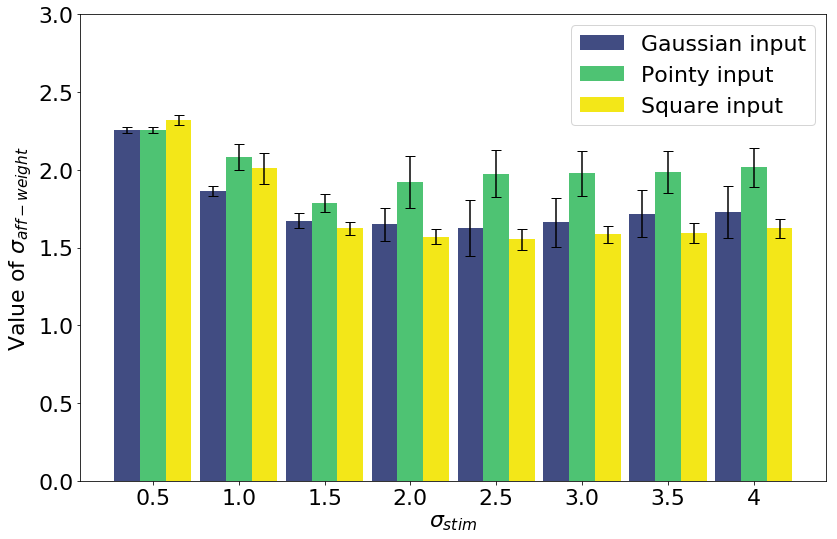

In [33]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)    
# (len(sigma_stims), len(lesion_types), len(input_types)          
ax1.bar(np.arange(len(sigma_stims))-.3, np.mean(std_weight_all_results[:, 0, :], axis=1), 
            width=.3,
             yerr=stats.sem(std_weight_all_results[:, :, 0], axis=1),
            color='#414C82',
            linewidth=3, 
           label='Gaussian input')
        
ax1.bar(np.arange(len(sigma_stims)), np.mean(std_weight_all_results[:, 1, :], axis=1), 
            width=.3,
             yerr=stats.sem(std_weight_all_results[:, :, 1], axis=1),
            color='#4EC373',
            linewidth=3,
           label='Pointy input')

        
ax1.bar(np.arange(len(sigma_stims))+.3, np.mean(std_weight_all_results[:, 2, :], axis=1), 
            width=.3,
             yerr=stats.sem(std_weight_all_results[:, :, 2], axis=1),
            color='#f3e718',
            linewidth=3,
           label='Square input')

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)


ax1.set_ylim([0, 3.0])
ax1.legend(loc='best')


plt.tight_layout()
plt.savefig("final_mean_std_stderr_bar_input_types.png")
plt.savefig("final_mean_std_stderr_bar_input_types.svg")
plt.show()

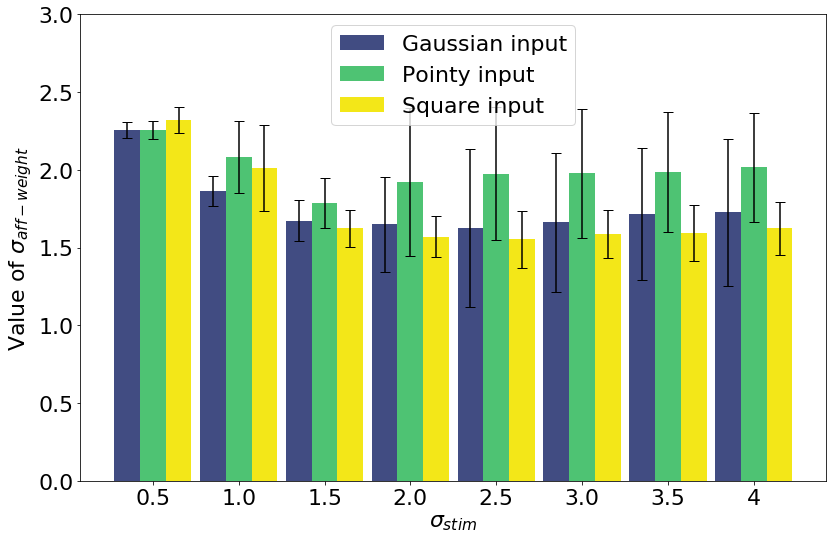

In [34]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)   
# (len(sigma_stims), len(lesion_types), len(input_types)           
ax1.bar(np.arange(len(sigma_stims))-.3, np.mean(std_weight_all_results[:, 0, :], axis=1), 
            width=.3,
             yerr=2*np.std(std_weight_all_results[:, :, 0], axis=1),
            color='#414C82',
            linewidth=3, 
           label='Gaussian input')
        
ax1.bar(np.arange(len(sigma_stims)), np.mean(std_weight_all_results[:, 1, :], axis=1), 
            width=.3,
             yerr=2*np.std(std_weight_all_results[:, :, 1], axis=1),
            color='#4EC373',
            linewidth=3, 
           label='Pointy input')

        
ax1.bar(np.arange(len(sigma_stims))+.3, np.mean(std_weight_all_results[:, 2, :], axis=1), 
            width=.3,
             yerr=2*np.std(std_weight_all_results[:, :, 2], axis=1),
            color='#f3e718',
            linewidth=3, 
           label='Square input')

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)



ax1.set_ylim([0, 3.0])
ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_std_2std_bar_input_types.png")
plt.savefig("final_mean_std_2std_bar_input_types.svg")
plt.show()

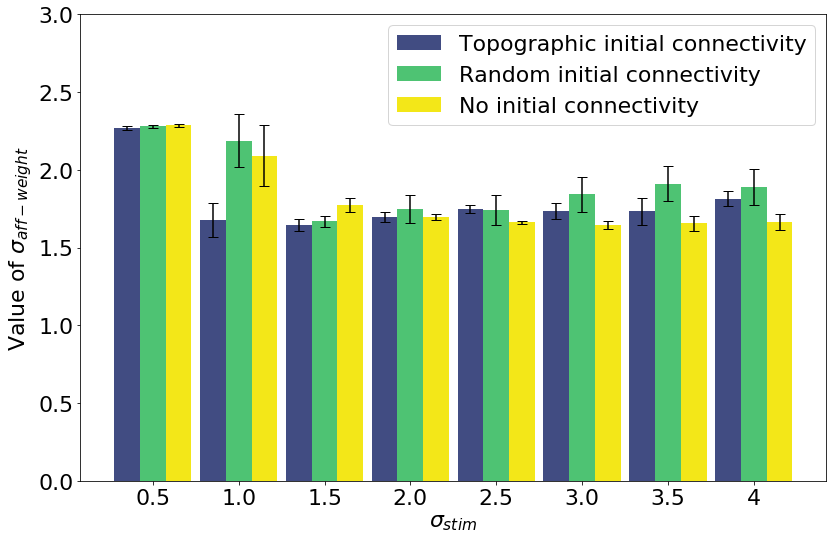

In [35]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)         
# (len(sigma_stims), len(lesion_types), len(input_types)     
ax1.bar(np.arange(len(sigma_stims))-.3, np.mean(std_weight_all_results[:, :, 0], axis=1), 
            width=.3,
             yerr=stats.sem(std_weight_all_results[:, 0, :], axis=1),
            color='#414C82',
            linewidth=3, 
           label='Topographic initial connectivity')
        
ax1.bar(np.arange(len(sigma_stims)), np.mean(std_weight_all_results[:, :, 1], axis=1), 
            width=.3,
             yerr=stats.sem(std_weight_all_results[:, 1, :], axis=1),
            color='#4EC373',
            linewidth=3, 
           label='Random initial connectivity')

        
ax1.bar(np.arange(len(sigma_stims))+.3, np.mean(std_weight_all_results[:, :, 2], axis=1), 
            width=.3,
             yerr=stats.sem(std_weight_all_results[:, 2, :], axis=1),
            color='#f3e718',
            linewidth=3, 
           label='No initial connectivity' )

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)



ax1.set_ylim([0, 3.0])
ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_std_stderr_bar_lesion_types.png")
plt.savefig("final_mean_std_stderr_bar_lesion_types.svg")
plt.show()

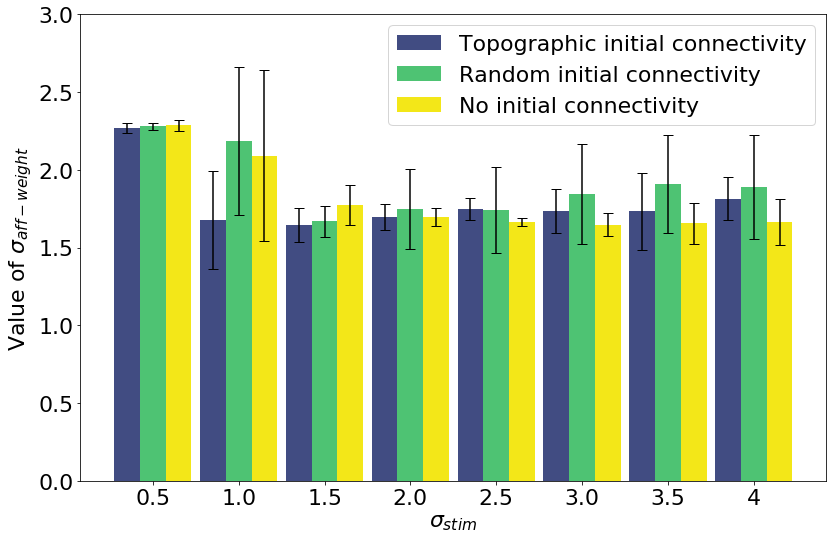

In [36]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)   
# (len(sigma_stims), len(lesion_types), len(input_types)       
ax1.bar(np.arange(len(sigma_stims))-.3, np.mean(std_weight_all_results[:, :, 0], axis=1), 
            width=.3,
             yerr=2*np.std(std_weight_all_results[:, 0, :], axis=1),
            color='#414C82',
            linewidth=3, 
           label='Topographic initial connectivity')
        
ax1.bar(np.arange(len(sigma_stims)), np.mean(std_weight_all_results[:, :, 1], axis=1), 
            width=.3,
             yerr=2*np.std(std_weight_all_results[:, 1, :], axis=1),
            color='#4EC373',
            linewidth=3, 
           label='Random initial connectivity')

        
ax1.bar(np.arange(len(sigma_stims))+.3, np.mean(std_weight_all_results[:, :, 2], axis=1), 
            width=.3,
             yerr=2*np.std(std_weight_all_results[:, 2, :], axis=1),
            color='#f3e718',
            linewidth=3, 
           label='No initial connectivity')

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $\sigma_{aff-weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)



ax1.set_ylim([0, 3.0])
ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_std_2std_bar_lesion_types.png")
plt.savefig("final_mean_std_2std_bar_lesion_types.svg")
plt.show()

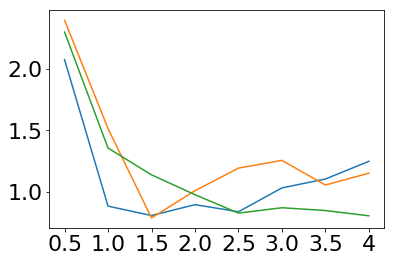

In [37]:
plt.plot(ad_weight_all_results[:, 0, 0])
plt.plot(ad_weight_all_results[:, 0, 1])
plt.plot(ad_weight_all_results[:, 0, 2])
plt.xticks(range(len(sigma_stims)), sigma_stims)
plt.show()

Gaussian input with topographic initial connectivity - min=0.81 max=2.08 std=0.39 sigma_stim=1.50
(debug info: #3E0A4F - )
Gaussian input with random initial connectivity    - min=0.79 max=2.40 std=0.46 sigma_stim=1.50
(debug info: #3E0A4F -- )
Gaussian input with no initial connectivity        - min=0.80 max=2.30 std=0.47 sigma_stim=4.00
(debug info: #3E0A4F : )
Pointy input with topographic initial connectivity - min=0.85 max=2.24 std=0.51 sigma_stim=1.00
(debug info: #366488 - )
Pointy input with random initial connectivity      - min=0.93 max=2.38 std=0.49 sigma_stim=1.50
(debug info: #366488 -- )
Pointy input with no initial connectivity          - min=0.85 max=2.32 std=0.48 sigma_stim=2.50
(debug info: #366488 : )
Square input with topographic initial connectivity - min=0.65 max=1.74 std=0.34 sigma_stim=2.00
(debug info: #f3e718 - )
Square input with random initial connectivity      - min=0.70 max=1.98 std=0.43 sigma_stim=1.50
(debug info: #f3e718 -- )
Square input with no initia

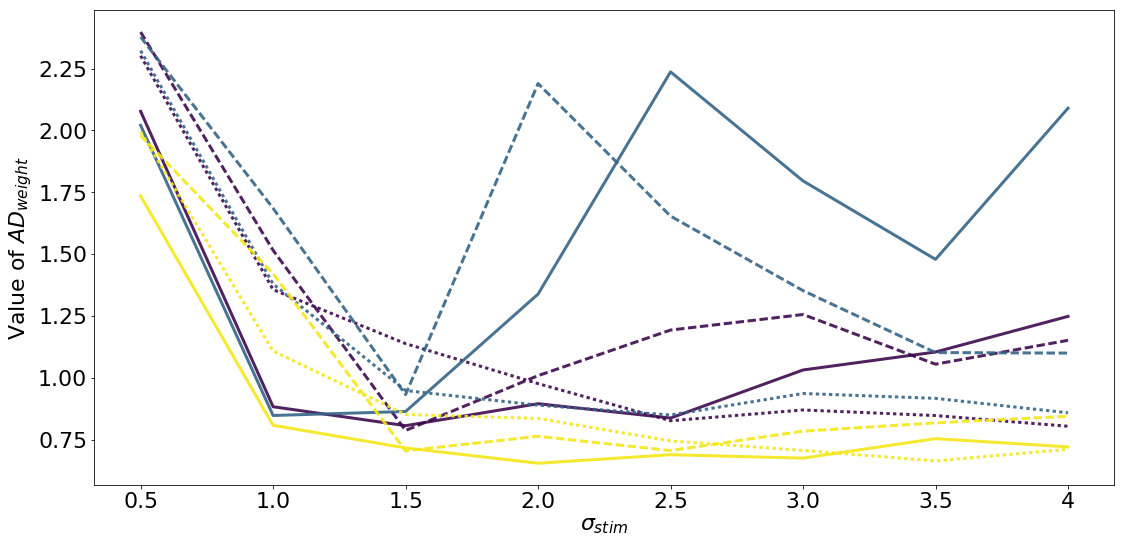

In [38]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
# conc_std_1 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_1, axis=0)))
# conc_std_2 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_2, axis=0)))
# conc_std_3 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_3, axis=0)))

# conc_std_1_std = np.concatenate(([0], stats.sem(all_mean_sigmas_case_1, axis=0)))
# conc_std_2_std = np.concatenate(([0], stats.sem(all_mean_sigmas_case_2, axis=0)))
# conc_std_3_std = np.concatenate(([0], stats.sem(all_mean_sigmas_case_3, axis=0)))


# i = \
# ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $\sigma_{aff\_weight}$ case 1', alpha=.9, linewidth=3)
# ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $\sigma_{aff\_weight}$ case 2', alpha=.7, linewidth=3)
# ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $\sigma_{aff\_weight}$ case 3', alpha=.7, linewidth=3)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )

lines = []
labels= []

for input_type, input_colour in zip(range(len(input_types)), ['#3E0A4F', '#366488','#f3e718']):
    for lesion_type, lesion_ls in zip(range(len(lesion_types)),['-', '--', ':']): 
        the_x = ad_weight_all_results[:, input_type, lesion_type]
        l = r'$\mathrm{AD}$ ' + '{} input with {}'.format(input_text[input_type], lesion_text[lesion_type])
        labels.append(l)
        
        print "{:50s} - min={:1.2f} max={:1.2f} std={:1.2f} sigma_stim={:1.2f}".format(l[14:], np.min(the_x), np.max(the_x), np.std(the_x), sigma_stims[np.argmin(the_x)])
        print "(debug info:", input_colour, lesion_ls, ")"
        lines.append(ax1.plot(range(len(sigma_stims)), the_x, 
                         label=l, 
                         alpha=.9, linewidth=3,
                        linestyle=lesion_ls, color=input_colour)
                     )
            
# ax1.errorbar(range(len(sigma_stims)), np.mean(np.mean(ad_weight_all_results[:, :, :], axis=1), axis=1), 
#              np.std(np.mean(ad_weight_all_results[:, :, :], axis=1), axis=1), 
#              color='k', linewidth=3, alpha=.8)

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $AD_{weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_ad_sigma_stim_vs_input_type_vs_lesion_type.png")
plt.savefig("final_mean_ad_sigma_stim_vs_input_type_vs_lesion_type.svg")
plt.show()

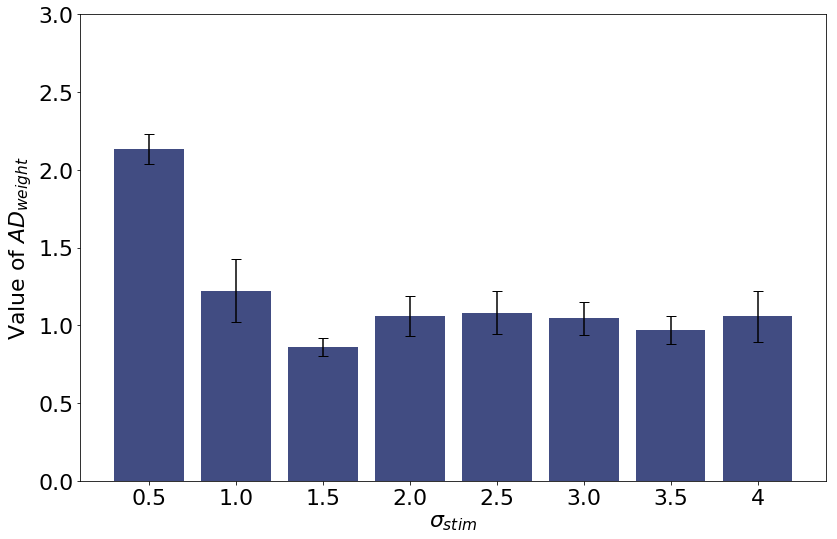

In [39]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)            
ax1.bar(range(len(sigma_stims)), np.mean(np.mean(ad_weight_all_results[:, :, :], axis=1), axis=1), 
             yerr=stats.sem(np.mean(ad_weight_all_results[:, :, :], axis=1), axis=1), 
#              color='k',
            color='#414C82',
            linewidth=3)
ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $AD_{weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)

ax1.set_ylim([0, 3.0])
# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_ad_stderr_bar.png")
plt.savefig("final_mean_ad_stderr_bar.svg")
plt.show()

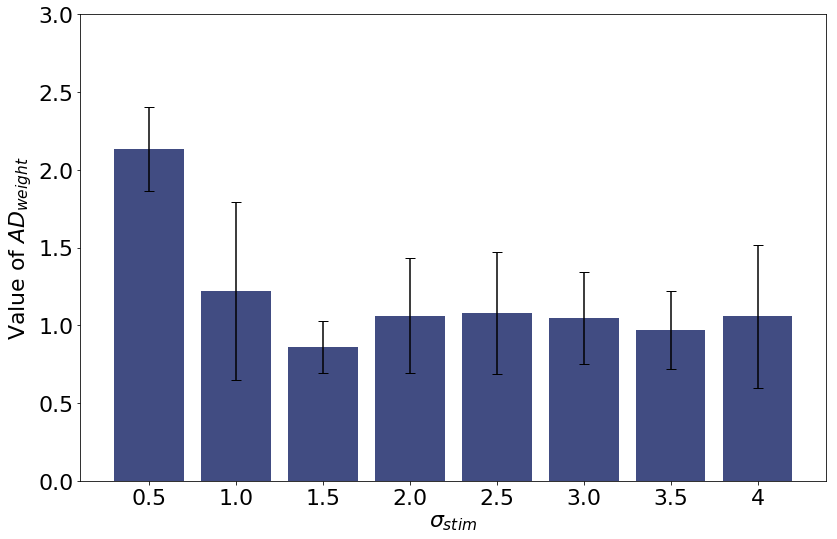

In [40]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)            
ax1.bar(range(len(sigma_stims)), np.mean(np.mean(ad_weight_all_results[:, :, :], axis=1), axis=1), 
             yerr=2*np.std(np.mean(ad_weight_all_results[:, :, :], axis=1), axis=1), 
#              color='k', 
            color='#414C82',
            linewidth=3)
ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $AD_{weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)

ax1.set_ylim([0, 3.0])
# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_ad_2std_bar.png")
plt.savefig("final_mean_ad_2std_bar.svg")
plt.show()

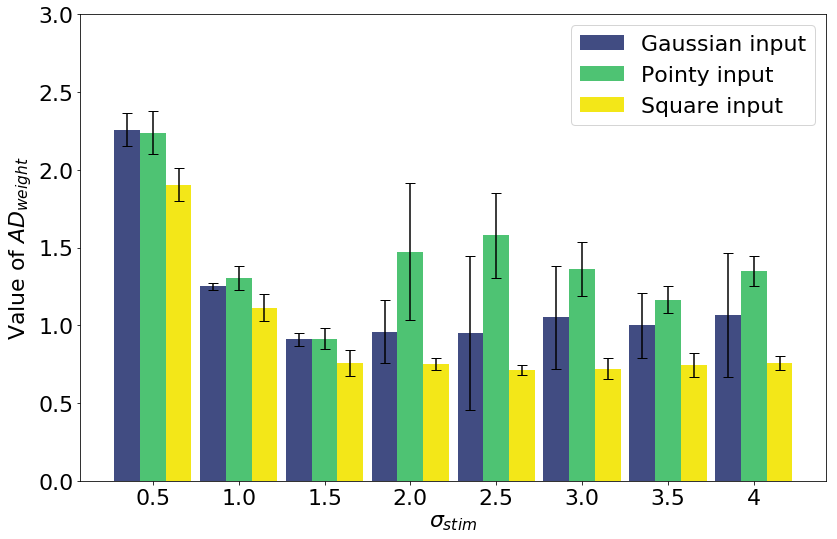

In [41]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)   
# (len(sigma_stims), len(lesion_types), len(input_types)
ax1.bar(np.arange(len(sigma_stims))-.3, np.mean(ad_weight_all_results[:, 0, :], axis=1), 
            width=.3,
             yerr=stats.sem(ad_weight_all_results[:, :, 0], axis=1),
            color='#414C82',
            linewidth=3, 
           label='Gaussian input')
        
ax1.bar(np.arange(len(sigma_stims)), np.mean(ad_weight_all_results[:, 1, :], axis=1), 
            width=.3,
             yerr=stats.sem(ad_weight_all_results[:, :, 1], axis=1),
            color='#4EC373',
            linewidth=3, 
           label='Pointy input')

        
ax1.bar(np.arange(len(sigma_stims))+.3, np.mean(ad_weight_all_results[:, 2, :], axis=1), 
            width=.3,
             yerr=stats.sem(ad_weight_all_results[:, :, 2], axis=1),
            color='#f3e718',
            linewidth=3, 
           label='Square input')

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $AD_{weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)

ax1.set_ylim([0, 3.0])
ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_ad_stderr_bar_input_types.png")
plt.savefig("final_mean_ad_stderr_bar_input_types.svg")
plt.show()

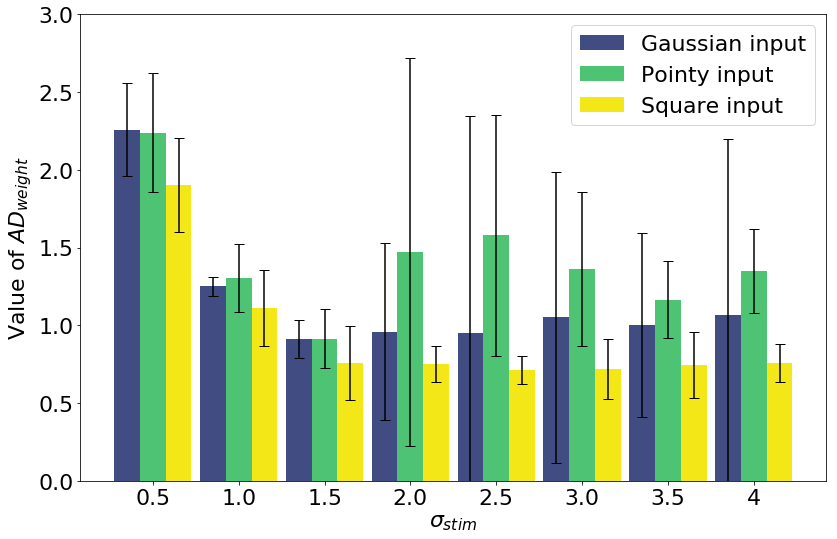

In [42]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)            
# (len(sigma_stims), len(lesion_types), len(input_types)
ax1.bar(np.arange(len(sigma_stims))-.3, np.mean(ad_weight_all_results[:, 0, :], axis=1), 
            width=.3,
             yerr=2*np.std(ad_weight_all_results[:, :, 0], axis=1),
            color='#414C82',
            linewidth=3, 
           label='Gaussian input')
        
ax1.bar(np.arange(len(sigma_stims)), np.mean(ad_weight_all_results[:, 1, :], axis=1), 
            width=.3,
             yerr=2*np.std(ad_weight_all_results[:, :, 1], axis=1),
            color='#4EC373',
            linewidth=3, 
           label='Pointy input')

        
ax1.bar(np.arange(len(sigma_stims))+.3, np.mean(ad_weight_all_results[:, 2, :], axis=1), 
            width=.3,
             yerr=2*np.std(ad_weight_all_results[:, :, 2], axis=1),
            color='#f3e718',
            linewidth=3, 
           label='Square input')

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $AD_{weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)

ax1.set_ylim([0, 3.0])
ax1.legend(loc='best')
# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_ad_2std_bar_input_types.png")
plt.savefig("final_mean_ad_2std_bar_input_types.svg")
plt.show()

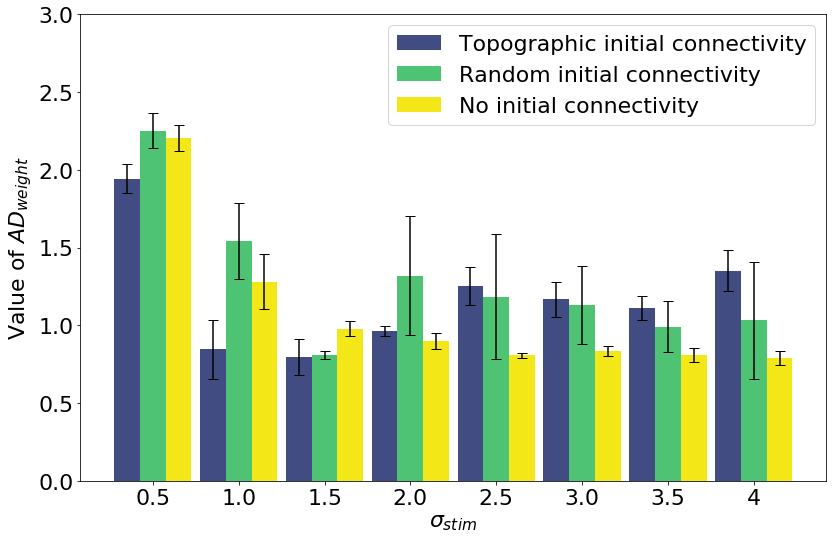

In [43]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)  
# (len(sigma_stims), len(lesion_types), len(input_types)
ax1.bar(np.arange(len(sigma_stims))-.3, np.mean(ad_weight_all_results[:, :, 0], axis=1), 
            width=.3,
             yerr=stats.sem(ad_weight_all_results[:, 0, :], axis=1),
            color='#414C82',
            linewidth=3, 
           label='Topographic initial connectivity')
        
ax1.bar(np.arange(len(sigma_stims)), np.mean(ad_weight_all_results[:, :, 1], axis=1), 
            width=.3,
             yerr=stats.sem(ad_weight_all_results[:, 1, :], axis=1),
            color='#4EC373',
            linewidth=3, 
           label='Random initial connectivity')

        
ax1.bar(np.arange(len(sigma_stims))+.3, np.mean(ad_weight_all_results[:, :, 2], axis=1), 
            width=.3,
             yerr=stats.sem(ad_weight_all_results[:, 2, :], axis=1),
            color='#f3e718',
            linewidth=3, 
           label='No initial connectivity')

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $AD_{weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)



ax1.set_ylim([0, 3.0])
ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_ad_stderr_bar_lesion_types.png")
plt.savefig("final_mean_ad_stderr_bar_lesion_types.eps")
plt.show()

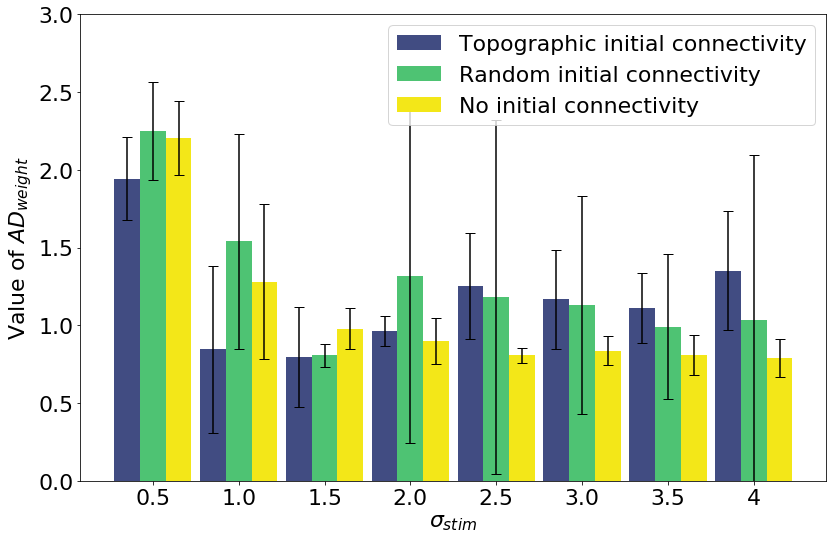

In [44]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12, 8), dpi=600)    

# (len(sigma_stims), len(lesion_types), len(input_types)
ax1.bar(np.arange(len(sigma_stims))-.3, np.mean(ad_weight_all_results[:, :, 0], axis=1), 
            width=.3,
             yerr=2*np.std(ad_weight_all_results[:, 0, :], axis=1),
            color='#414C82',
            linewidth=3, 
           label='Topographic initial connectivity')
        
ax1.bar(np.arange(len(sigma_stims)), np.mean(ad_weight_all_results[:, :, 1], axis=1), 
            width=.3,
             yerr=2*np.std(ad_weight_all_results[:, 1, :], axis=1),
            color='#4EC373',
            linewidth=3, 
           label='Random initial connectivity')

        
ax1.bar(np.arange(len(sigma_stims))+.3, np.mean(ad_weight_all_results[:, :, 2], axis=1), 
            width=.3,
             yerr=2*np.std(ad_weight_all_results[:, 2, :], axis=1),
            color='#f3e718',
            linewidth=3, 
           label='No initial connectivity')

ax1.grid(visible=False)
# ax1.set_title("Evolution of the mean $\sigma_{aff-weight}$ over time")
ax1.set_xlabel("$\sigma_{stim}$")
ax1.set_ylabel("Value of $AD_{weight}$")


ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims)



ax1.set_ylim([0, 3.0])
ax1.legend(loc='best')

# ax1.legend(loc='best')
plt.tight_layout()
plt.savefig("final_mean_ad_2std_bar_lesion_types.png")
plt.savefig("final_mean_ad_2std_bar_lesion_types.eps", dpi=800)
plt.show()

# Sanity check. Print results for a lesion 0, 1, 2 and for an input type 1,2, 4

In [45]:
print "For case 1, no lesion (lesion 0), Gaussian input (input 1) sigma init should be", 2.35
# (len(sigma_stims), len(lesion_types), len(input_types)
print init_std_weight_all_results[3, 0, 0]

print "For case 1, no lesion (lesion 0), Gaussian input (input 1) AD init should be", 0.81
# (len(sigma_stims), len(lesion_types), len(input_types)
print init_ad_weight_all_results[3, 0, 0]

For case 1, no lesion (lesion 0), Gaussian input (input 1) sigma init should be 2.35
2.354969065
For case 1, no lesion (lesion 0), Gaussian input (input 1) AD init should be 0.81
0.819992505817


In [46]:
print "For case 1, random connectivity (lesion 1), Gaussian input (input 1) sigma init should be random"
# (len(sigma_stims), len(lesion_types), len(input_types)
print init_std_weight_all_results[3, 1, 0]

print "For case 1, random connectivity (lesion 0), Gaussian input (input 1) AD init should be random"
# (len(sigma_stims), len(lesion_types), len(input_types)
print init_ad_weight_all_results[3, 1, 0]

For case 1, random connectivity (lesion 1), Gaussian input (input 1) sigma init should be random
3.73543659705
For case 1, random connectivity (lesion 0), Gaussian input (input 1) AD init should be random
6.12901895918


In [47]:
print "For case 1, no connectivity (lesion 2), Gaussian input (input 1) sigma init should be", 0
# (len(sigma_stims), len(lesion_types), len(input_types)
print init_std_weight_all_results[3, 2, 0]

For case 1, no connectivity (lesion 2), Gaussian input (input 1) sigma init should be 0
0.0


In [48]:
print "For case 1, no lesion (lesion 0), Square input (input 2) sigma init should be known"
# (len(sigma_stims), len(lesion_types), len(input_types)
print init_std_weight_all_results[3, 0, 2]

print "For case 1, no lesion (lesion 0),, Square input (input 2) AD init should be known"
# (len(sigma_stims), len(lesion_types), len(input_types)
print init_ad_weight_all_results[3, 0, 2]

For case 1, no lesion (lesion 0), Square input (input 2) sigma init should be known
2.354969065
For case 1, no lesion (lesion 0),, Square input (input 2) AD init should be known
0.819992505817


# Sigma stim vs sigma form lat

In [50]:
# I forgot to save p_elim_dep for each run. Extract it from file name
data = np.load("C:/Work/phd/simulation_statistics/batch_analysis_084055_25012018.npz")
metadata = np.load("C:/Work/phd/simulation_statistics/batch_c9447256ce07487274eab53b5ea9c2d8.npz")
print data['recording_archive_name']
print 'Total time taken for simulations:', metadata['total_time']

../synaptogenesis/c9447256ce07487274eab53b5ea9c2d8/case1_sstim3.5_sformlat3.5_run1_@c9447256ce07487274eab53b5ea9c2d8.npz
Total time taken for simulations: 7:37:05.631831


In [51]:
snapshots = data['snapshots']
params = data['params']
dt = np.dtype([('rate', 'float'), 
               ('number_ff_synapses', 'float'), 
               ('final_weight_proportion', 'float'), 
               ('init_mean_std', 'float'),
               ('fin_mean_std_conn_shuf', 'float'),
               ('fin_mean_std_conn', 'float'),
               ('wsr_sigma_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_std_weight_shuf', 'float'),
               ('fin_mean_std_weight', 'float'),
               ('wsr_sigma_fin_weight_fin_weight_shuffle', 'float'),
               ('init_mean_AD', 'float'),
               ('fin_mean_AD_conn_shuf', 'float'),
               ('fin_mean_AD_conn', 'float'),
               ('wsr_AD_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_AD_weight_shuf', 'float'),
               ('fin_mean_AD_weight', 'float'),
               ('wsr_AD_fin_weight_fin_weight_shuffle', 'float'),
#                ('file_path', 'S59')
              ])
results = np.array(data['results'][:, :-1], dtype=dt)

In [52]:
parameters_of_interest = metadata['parameters_of_interest']

In [53]:
parameters_of_interest

array({'sigma_form_lats': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], 'no_runs': 1, 'cases': [1], 'sigma_stims': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]}, dtype=object)

In [54]:
all_names = np.asarray(results.dtype.names)
interesting_names = all_names[np.where(['init' not in name and 'wsr' not in name for name in all_names])]
interesting_names_indices = np.where(['init' not in name and 'wsr' not in name for name in all_names])[0]
print interesting_names
print interesting_names.shape
print [interesting_names[0]]
print results[interesting_names[0]].shape
print results['rate'].shape
print results['rate'].size

['rate' 'number_ff_synapses' 'final_weight_proportion'
 'fin_mean_std_conn_shuf' 'fin_mean_std_conn' 'fin_mean_std_weight_shuf'
 'fin_mean_std_weight' 'fin_mean_AD_conn_shuf' 'fin_mean_AD_conn'
 'fin_mean_AD_weight_shuf' 'fin_mean_AD_weight']
(11L,)
['rate']
(49L, 17L)
(49L, 17L)
833


In [55]:
del parameters_of_interest.ravel()[0]['no_runs']

In [60]:
parameters_of_interest.ravel()[0]['sigma_form_laterals'] = parameters_of_interest.ravel()[0].pop('sigma_form_lats')

In [61]:
params_of_interest = parameters_of_interest.ravel()[0].keys()
set_of_poi = np.ones((results.shape[0], len(params_of_interest))) * np.nan
for index, param_set in np.ndenumerate(params[:,0]):
    for poi in range(len(params_of_interest)):
        set_of_poi[index[0], poi] = param_set[params_of_interest[poi][:-1]]

In [62]:
results_with_poi = np.concatenate((np.asarray(results[:, interesting_names_indices], dtype=float), set_of_poi), axis=1)

In [63]:
parameters_of_interest

array({'cases': [1], 'sigma_form_laterals': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], 'sigma_stims': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]}, dtype=object)

In [64]:
sigma_stims = parameters_of_interest.ravel()[0]['sigma_stims']
sigma_form_laterals = parameters_of_interest.ravel()[0]['sigma_form_laterals']
hardcoded_t_record = 300 * second

print sigma_stims
print sigma_form_laterals
print params_of_interest

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
['cases', 'sigma_form_laterals', 'sigma_stims']


In [87]:
rates_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan
weight_prop = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

std_weight_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan
ad_weight_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

std_conn_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan
ad_conn_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

no_ff_conns= np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

CASE_1 = 1
for index, _ in np.ndenumerate(std_weight_all_results):
    sigma_index, sform_index = index
    logical_filter = np.logical_and(
                        np.logical_and(results_with_poi[:,-3]==CASE_1, results_with_poi[:, -1]==sigma_stims[sigma_index]),
                        results_with_poi[:,-2]==sigma_form_laterals[sform_index])
    std_weight_all_results[index] = results_with_poi[logical_filter].ravel()[6]
    ad_weight_all_results[index] = results_with_poi[logical_filter].ravel()[10]
    # use different set of results
    std_conn_all_results[index] =results_with_poi[logical_filter].ravel()[4]
    ad_conn_all_results[index] = results_with_poi[logical_filter].ravel()[8]
    
    rates_all_results[index] = results_with_poi[logical_filter].ravel()[0]
    weight_prop[index] = results_with_poi[logical_filter].ravel()[2]
    
    no_ff_conns[index] = results_with_poi[logical_filter].ravel()[1]
    



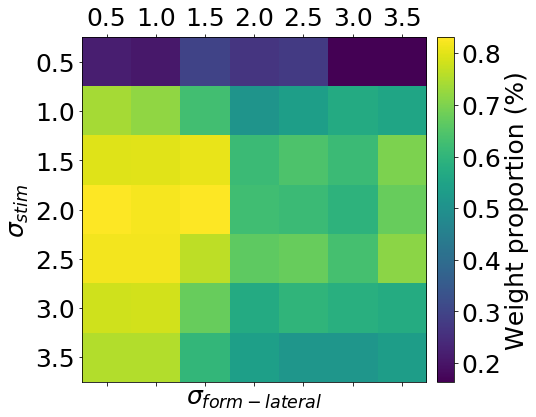

In [88]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(weight_prop)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Weight proportion (%)")
plt.tight_layout()
f.savefig('weight_proportion_sigma_stim_vs_sigma_form_lat.png')

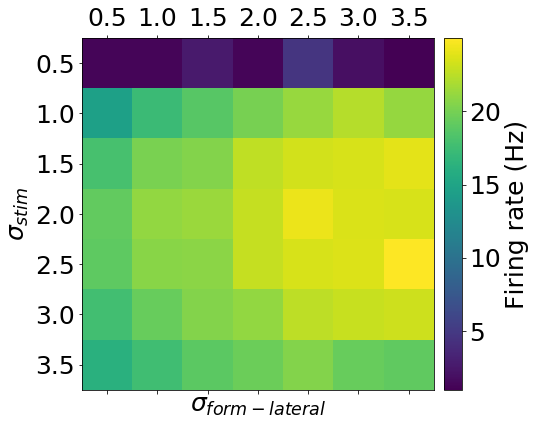

In [89]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(rates_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Firing rate (Hz)")
plt.tight_layout()
f.savefig('rates_sigma_stim_vs_sigma_form_lat.png')

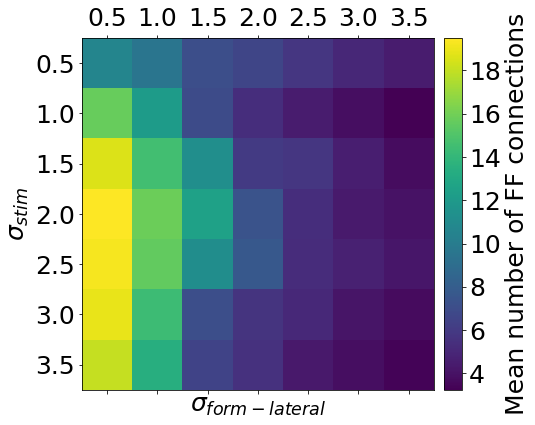

In [94]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(no_ff_conns)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean number of FF connections")
plt.tight_layout()
f.savefig('no_ff_conns_sigma_stim_vs_sigma_form_lat.png')

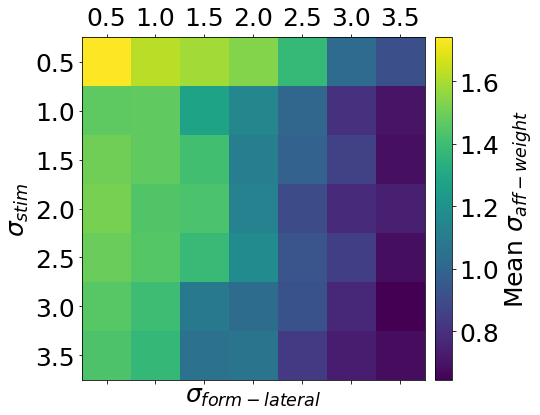

In [91]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(std_weight_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $\sigma_{aff-weight}$")
plt.tight_layout()
f.savefig('std_weight_sigma_stim_vs_sigma_form_lat.png')

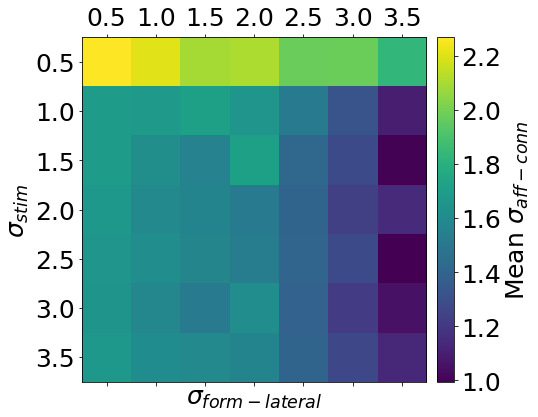

In [92]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(std_conn_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $\sigma_{aff-conn}$")
plt.tight_layout()
f.savefig('std_conn_sigma_stim_vs_sigma_form_lat.png')

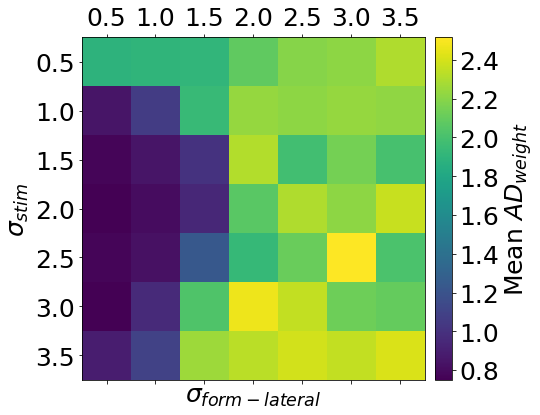

In [93]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(ad_weight_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $AD_{weight}$")
plt.tight_layout()
f.savefig('ad_weight_sigma_stim_vs_sigma_form_lat.png')

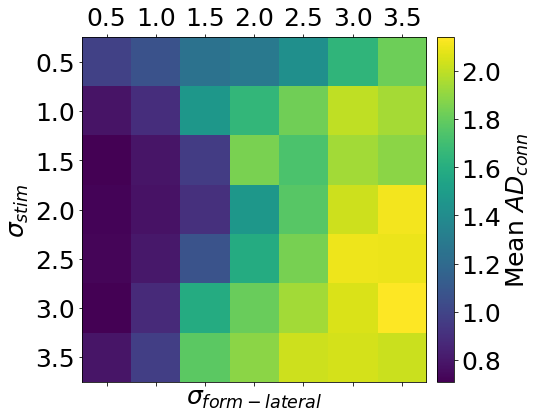

In [86]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(ad_conn_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $AD_{conn}$")
plt.tight_layout()
f.savefig('ad_conn_sigma_stim_vs_sigma_form_lat.png')

# These details in numbers

In [95]:
from pprint import pprint as pp
print "rates_all_results \n", pp(rates_all_results)
print "weight_prop \n", pp(weight_prop )

print "std_weight_all_results \n", pp(std_weight_all_results) 
print "ad_weight_all_results \n", pp(ad_weight_all_results) 

print "std_conn_all_results \n", pp(std_conn_all_results) 
print "ad_conn_all_results \n", pp(ad_conn_all_results)

print "no_ff_conns \n", pp(no_ff_conns)


rates_all_results 
array([[  1.35630208,   1.36105469,   2.69829427,   1.34335937,
          4.67065104,   1.97726563,   1.00208333],
       [ 14.64227865,  17.33667969,  18.74226563,  20.11049479,
         21.27695312,  22.31035156,  21.16230469],
       [ 18.01893229,  20.1431901 ,  20.56395833,  22.67421875,
         23.34276042,  23.501875  ,  23.95988281],
       [ 19.24596354,  21.13924479,  21.35394531,  22.88936198,
         24.31108073,  23.66184896,  23.48901042],
       [ 19.06492187,  20.67855469,  20.81263021,  22.90769531,
         23.57067708,  23.6916276 ,  24.9844401 ],
       [ 17.68372396,  19.40553385,  20.50190104,  21.12117188,
         22.63393229,  22.96527344,  23.11846354],
       [ 16.1803125 ,  17.6183724 ,  18.97326823,  19.57550781,
         20.57790365,  19.39347656,  19.096875  ]])
None
weight_prop 
array([[ 0.21948952,  0.20551055,  0.29717161,  0.26653   ,  0.27780685,
         0.16378413,  0.16545565],
       [ 0.74023147,  0.72116258,  0.62913319,  0

In [96]:
np.unravel_index(std_weight_all_results.argmin(), std_weight_all_results.shape)

(5, 6)

In [97]:
np.unravel_index(ad_weight_all_results.argmin(), ad_weight_all_results.shape)

(3, 0)

In [98]:
np.unravel_index(std_weight_all_results.argmax(), std_weight_all_results.shape)

(0, 0)

In [99]:
np.unravel_index(ad_weight_all_results.argmax(), ad_weight_all_results.shape)

(4, 5)